<a href="https://colab.research.google.com/github/ImajiPietersz/FYP/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn import preprocessing
from sklearn import svm

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
DATASET_PATH = '/content/drive/MyDrive/FYP18-machine-vibration-source-separation/ LoRaWAN dataset/machine_2_noise_faultiness.csv'
IMP_COL = ['XOAVelocity', 'XPeakmg', 'XRMSmg', 'XKurtosis',
       'XCrestFactor', 'XSkewness', 'XDeviation', 'XPeaktoPeakDisplacement',
       'YOAVelocity', 'YPeakmg', 'YRMSmg', 'ZOAVelocity', 'ZPeakmg', 'ZRMSmg', 'target','converted','fault']
X_COL = ['XOAVelocity', 'XPeakmg', 'XRMSmg', 'XKurtosis',
       'XCrestFactor', 'XSkewness', 'XDeviation', 'XPeaktoPeakDisplacement',
       'YOAVelocity', 'YPeakmg', 'YRMSmg', 'ZOAVelocity', 'ZPeakmg','ZRMSmg','converted','fault']
TAR_COL = 'fault'

In [48]:
df = pd.read_csv(DATASET_PATH)[IMP_COL]
df.columns

Index(['XOAVelocity', 'XPeakmg', 'XRMSmg', 'XKurtosis', 'XCrestFactor',
       'XSkewness', 'XDeviation', 'XPeaktoPeakDisplacement', 'YOAVelocity',
       'YPeakmg', 'YRMSmg', 'ZOAVelocity', 'ZPeakmg', 'ZRMSmg', 'target',
       'converted', 'fault'],
      dtype='object')

In [49]:
df

,XOAVelocity,XPeakmg,XRMSmg,XKurtosis,XCrestFactor,XSkewness,XDeviation,XPeaktoPeakDisplacement,YOAVelocity,YPeakmg,YRMSmg,ZOAVelocity,ZPeakmg,ZRMSmg,target,converted,fault
0,7,18,13,-5,38,-4,8,1,8,11,8,20,156,111,0,2022-12-12 05:13,healthy
1,67,183,130,22,197,8,531,6,38,137,97,85,390,276,0,2022-12-12 05:19,healthy
2,20,48,34,-3,203,1,204,2,18,36,26,63,216,153,0,2022-12-12 05:19,healthy
3,218,305,216,-36,132,-5,291,23,232,306,217,132,117,83,0,2022-12-12 05:19,healthy
4,9,18,13,3,1039,-1,8,1,9,12,9,16,107,76,0,2022-12-12 05:43,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,36,50,36,9,831,3,8,3,39,52,37,70,302,214,0,2023-03-03 09:55,healthy
2180,21,41,29,27,1826,0,137,2,19,43,31,82,182,129,1,2023-03-03 10:05,healthy
2181,313,243,172,-22,296,2,234,38,158,137,97,344,183,130,1,2023-03-03 10:08,healthy
2182,30,45,32,8,1116,-8,9,3,45,60,43,65,305,216,1,2023-03-03 10:10,healthy


In [50]:
for index, row in df.iterrows(): 
  if row['fault']=='healthy':
    df['faultLabel']=1
  else:
    df['faultLabel']=-1

In [51]:
df

,XOAVelocity,XPeakmg,XRMSmg,XKurtosis,XCrestFactor,XSkewness,XDeviation,XPeaktoPeakDisplacement,YOAVelocity,YPeakmg,YRMSmg,ZOAVelocity,ZPeakmg,ZRMSmg,target,converted,fault,faultLabel
0,7,18,13,-5,38,-4,8,1,8,11,8,20,156,111,0,2022-12-12 05:13,healthy,1
1,67,183,130,22,197,8,531,6,38,137,97,85,390,276,0,2022-12-12 05:19,healthy,1
2,20,48,34,-3,203,1,204,2,18,36,26,63,216,153,0,2022-12-12 05:19,healthy,1
3,218,305,216,-36,132,-5,291,23,232,306,217,132,117,83,0,2022-12-12 05:19,healthy,1
4,9,18,13,3,1039,-1,8,1,9,12,9,16,107,76,0,2022-12-12 05:43,healthy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,36,50,36,9,831,3,8,3,39,52,37,70,302,214,0,2023-03-03 09:55,healthy,1
2180,21,41,29,27,1826,0,137,2,19,43,31,82,182,129,1,2023-03-03 10:05,healthy,1
2181,313,243,172,-22,296,2,234,38,158,137,97,344,183,130,1,2023-03-03 10:08,healthy,1
2182,30,45,32,8,1116,-8,9,3,45,60,43,65,305,216,1,2023-03-03 10:10,healthy,1


In [52]:
def splitTrainTest(ratio, data, labels):
  
  x_train, x_test,_ = np.split(data, [round(len(data) * ratio), len(data)])
  labels_train, labels_test,_ = np.split(labels, [round(len(labels) * ratio), len(labels)])

  return (x_train,labels_train, x_test,labels_test)

In [53]:
import tensorflow as tf

train_data, train_labels, test_data, test_labels = splitTrainTest(0.7, df, df['faultLabel'])

(len(train_data),len(test_data))

(1529, 655)

In [54]:
test_data

,XOAVelocity,XPeakmg,XRMSmg,XKurtosis,XCrestFactor,XSkewness,XDeviation,XPeaktoPeakDisplacement,YOAVelocity,YPeakmg,YRMSmg,ZOAVelocity,ZPeakmg,ZRMSmg,target,converted,fault,faultLabel
1529,23,60,43,24,576,0,208,2,37,56,40,89,289,205,0,2023-01-10 21:29,healthy,1
1530,275,246,174,-5,435,28,203,38,142,254,180,109,94,67,0,2023-01-10 21:30,healthy,1
1531,37,48,34,25,317,0,14,7,26,48,34,73,329,233,0,2023-01-10 21:35,healthy,1
1532,68,241,171,22,287,-2,737,13,92,308,218,252,1630,1153,0,2023-01-10 21:37,healthy,1
1533,11,7,5,9,87,19,0,2,11,7,5,35,24,17,0,2023-01-10 21:50,healthy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,36,50,36,9,831,3,8,3,39,52,37,70,302,214,0,2023-03-03 09:55,healthy,1
2180,21,41,29,27,1826,0,137,2,19,43,31,82,182,129,1,2023-03-03 10:05,healthy,1
2181,313,243,172,-22,296,2,234,38,158,137,97,344,183,130,1,2023-03-03 10:08,healthy,1
2182,30,45,32,8,1116,-8,9,3,45,60,43,65,305,216,1,2023-03-03 10:10,healthy,1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(


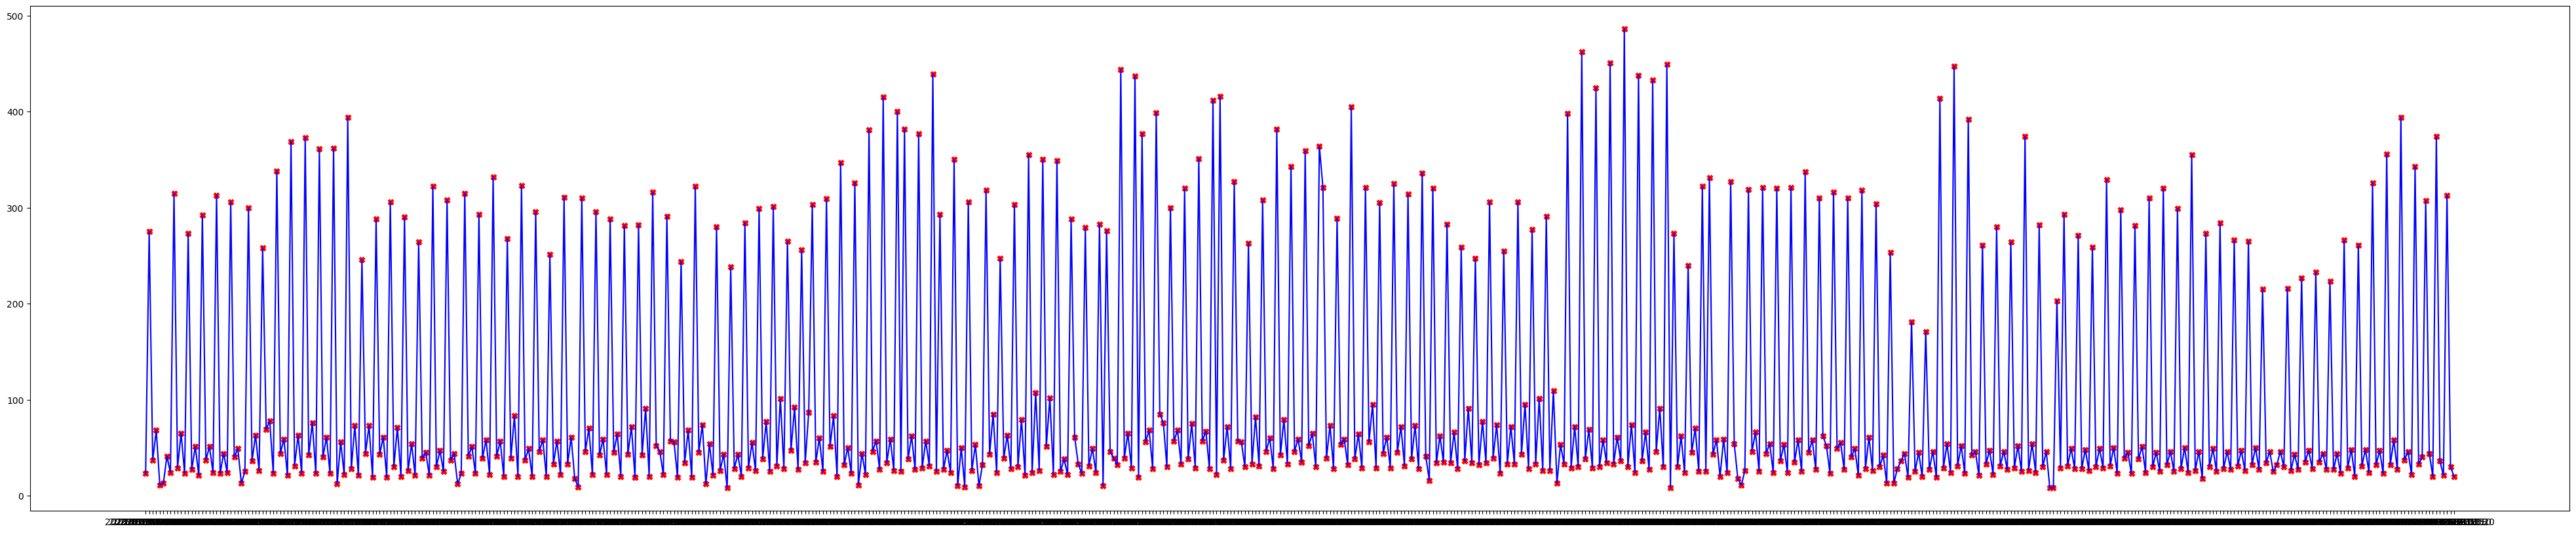

In [55]:
data = train_data[['XOAVelocity']]
scaler = preprocessing.StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train oneclassSVM 
model = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.02)
model.fit(data)
#train_data['anomaly_svm'] = pd.Series(model.predict(test_data[['XOAVelocity']])).values
test_data['anomaly_svm'] = pd.Series(model.predict(test_data[['XOAVelocity']])).values

fig, ax = plt.subplots(figsize=(50,10))
a = test_data.loc[test_data['anomaly_svm'] == -1, ['converted', 'XOAVelocity']] #anomaly
#print(len(a))

ax.plot(test_data['converted'], test_data['XOAVelocity'], color='blue')
ax.scatter(a['converted'],a['XOAVelocity'],  marker='X',color='red')

plt.show();

#fig, ax = plt.subplots(figsize=(50,10))
#a = train_data.loc[train_data['anomaly_svm'] == -1, ['converted', 'XOAVelocity']] #anomaly
#print(len(a))
#a = df.loc[df['anomaly_svm'] == -1, ['date_x', 'XOAVelocity']] #anomaly

#ax.plot(train_data['converted'], train_data['XOAVelocity'], color='blue')
#ax.scatter(a['converted'],a['XOAVelocity'],  marker='X',color='red')

#plt.show();

In [57]:
X_test = test_data[['XOAVelocity']]

# Predict labels for new data
y_pred = model.predict(X_test)

test_data['anomaly_svm'] = pd.Series(model.predict(X_test)).values

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(


In [59]:
len(y_pred)

655

In [58]:
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_test= test_labels
y_pred= y_pred

precision = precision_score(y_test, y_pred, pos_label=-1) # how many of the predicted anomalies are actually faults
recall = recall_score(y_test, y_pred, pos_label=-1) # how many of the actual faults were correctly identified as anomalies
f1score = f1_score(y_test, y_pred, pos_label=-1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
f1score

0.0

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00     655.0

    accuracy                           0.00     655.0
   macro avg       0.00      0.00      0.00     655.0
weighted avg       0.00      0.00      0.00     655.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.